In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов
from sklearn.metrics import matthews_corrcoef

In [2]:
wine_clean = pd.read_csv('data/wine_cleared.csv')
wine_clean.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<Axes: >

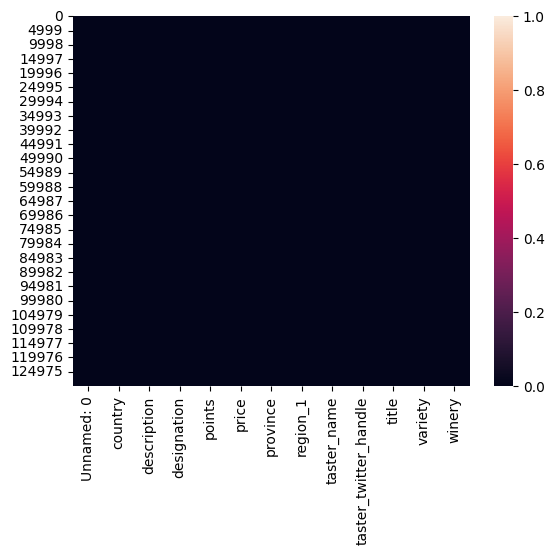

In [3]:
sns.heatmap(wine_clean.isnull())

1.1 Вычислите наименьший балл за вино в датасете.

In [4]:
point_min = wine_clean['points'].min()
display(point_min)

np.int64(80)

2.2 Вычислите наименьшую цену за бутылку в наборе данных.

In [5]:
price_min = wine_clean['price'].min()
display(price_min)

np.float64(4.0)

2.3 Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [6]:
price_mean = round(statistics.mean(wine_clean['price']), 2)
display(price_mean)

35.36

2.4 Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

In [7]:
price_mean_d = sum(wine_clean['price']) / len(wine_clean['price'])
display(price_mean_d)

35.363389129985535

2.5 Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [8]:
price_meadian_st = statistics.median(wine_clean['price'])
display(price_meadian_st)

28.0

2.6 Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

In [9]:
count_price = len(wine_clean['price']) # количество записей цен
sorted_price = sorted(wine_clean['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

2.7 Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [10]:
price_mode = round(statistics.mode(wine_clean['price']), 2)
display(price_mode)

35.36

2.8 Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

In [11]:
def compute_mode(values):
    count_dict = {}
    
    # Подсчитываем количество вхождений каждой цены
    for value in values:
        if value in count_dict:
            count_dict[value] += 1
        else:
            count_dict[value] = 1
            
    # Находим моду
    max_count = 0
    mode = None
    for key, count in count_dict.items():
        if count > max_count:
            max_count = count
            mode = key
            
    return mode

# Вычисляем моду
mode_price = compute_mode(wine_clean['price'])
display(mode_price)

35.363389129985535

In [12]:
mode_n = round(wine_clean["price"].value_counts().index[0],2)
display(mode_n)

np.float64(35.36)

3.3 Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

data.corr()

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [13]:
correlation = round(wine_clean['price'].corr(wine_clean['points']), 6)
display(correlation)

np.float64(0.402137)

*****************************************

* * Корелляция Пирсона

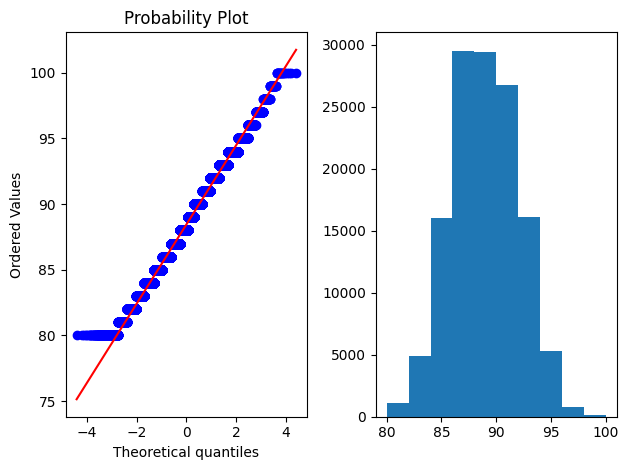

In [14]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_clean['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_clean['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

***********************************************

* * Корреляция Спирмена

5.1 Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [15]:
cor_spearman = round(wine_clean['points'].corr(wine_clean['price'], method='spearman'), 2)
display(cor_spearman)

np.float64(0.58)

***********************************

* * Корреляция Кендалла

5.2 Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [16]:
cor_kendall = round(wine_clean['points'].corr(wine_clean['price'], method='kendall'), 2)
display(cor_kendall)

np.float64(0.43)

*******************************

* * Корреляция Мэтьюса

In [17]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

display(round(matthews_corrcoef(x, y), 2)) # рассчитаем коэффициент корреляции Мэтьюса

np.float64(-0.33)

*******************************

**************************************

****************************************

In [18]:
model = pd.read_csv('data/model.csv')
model.head()

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


6.1 Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

<Axes: >

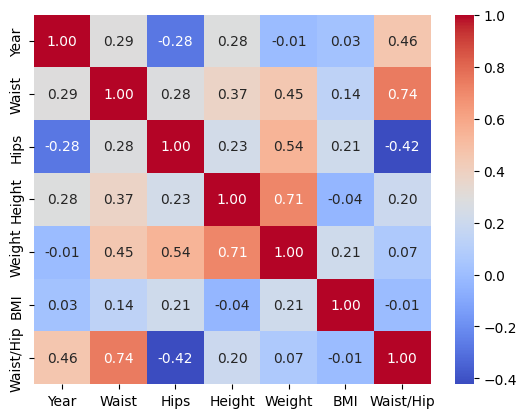

In [28]:
sns.heatmap(model.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)